# Práctica: Tensores y sus Aplicaciones
En esta práctica, trabajaremos con tensores desde su matricización hasta su aplicación práctica para la compresión de datos.

### Objetivos
1. Entender cómo vectorizar y matriciar un tensor.
2. Construir tensores a partir de tensores de rango 1 usando el producto externo.
3. Implementar el modelo PARAFAC para descomposición tensorial.

## 1. Vectorización y Matricización de Tensores
Un tensor puede ser representado como un vector o como una matriz dependiendo del modo en que se matriciza. Exploraremos diferentes modos y cómo realizar estas transformaciones.

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_47013/2185437244.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax_3d.set_title("Tensor Original $\mathcal{X}$ (3D)")
/tmp/ipykernel_47013/2185437244.py:50: SyntaxWarning: invalid escape sequence '\m'
  ax4.set_title("Vectorización $vec(\mathcal{X})$")


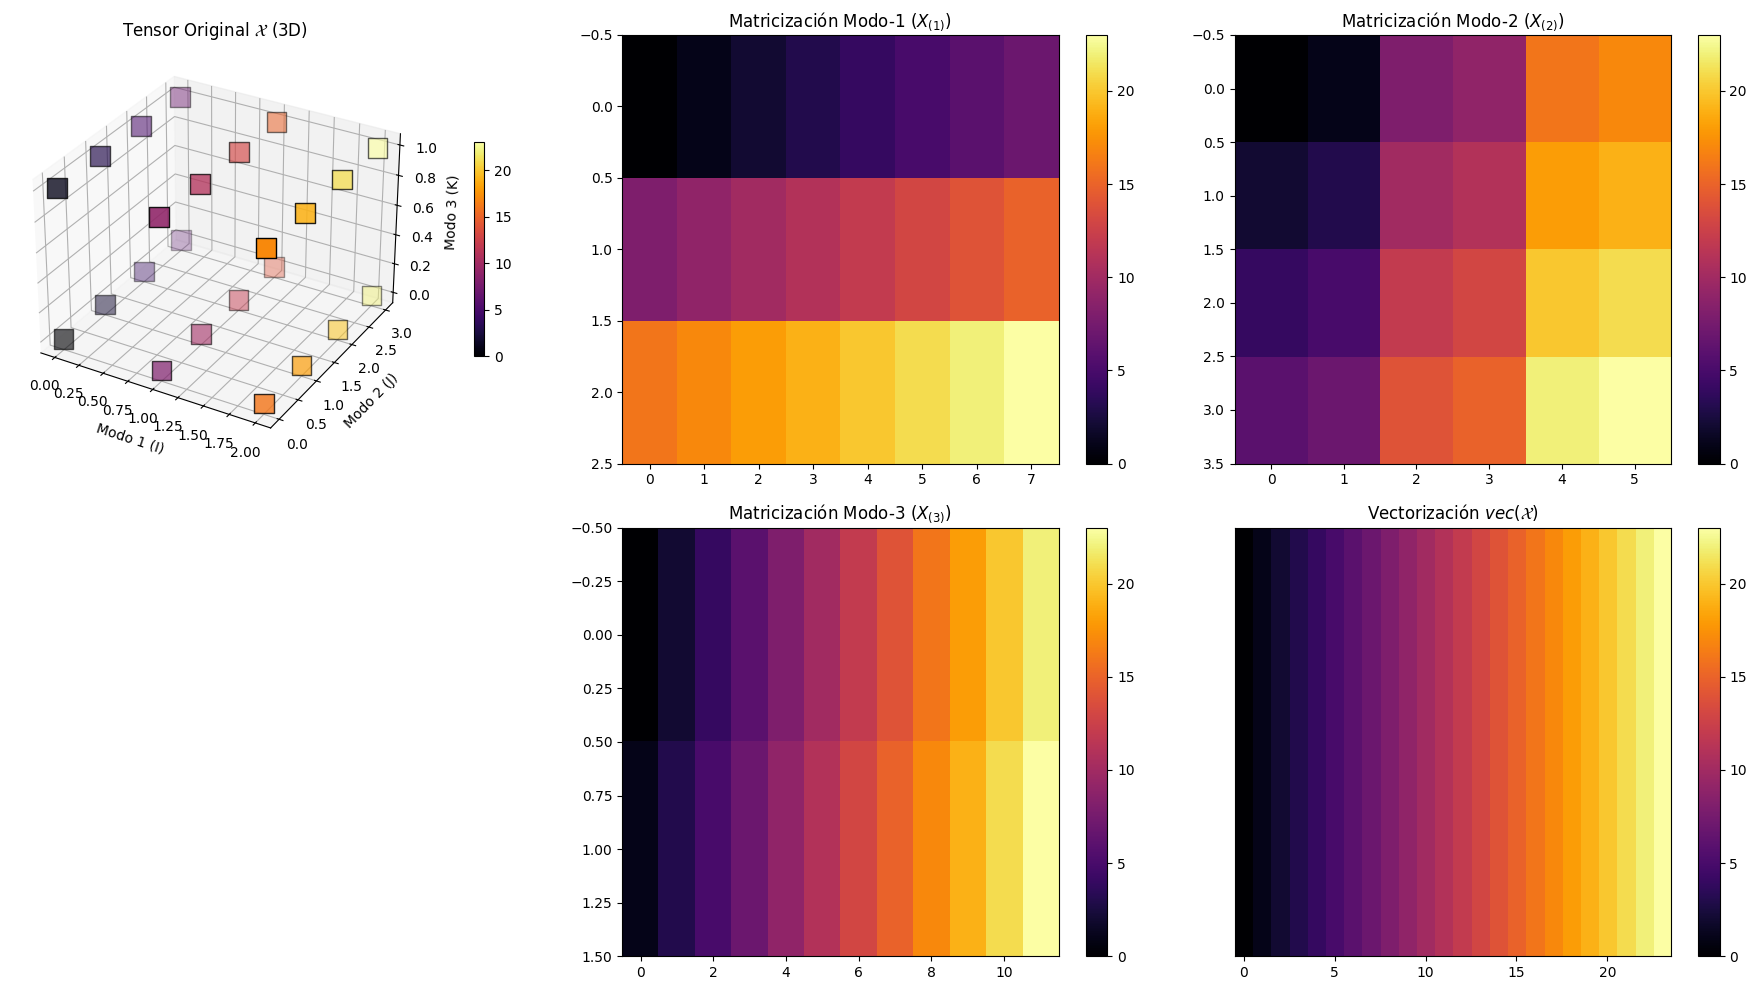

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Defino el tensor original (3x4x2)
tensor = np.arange(24).reshape(3, 4, 2)

# 2. Realizo las Matricizaciones (Unfoldings)
mode1 = np.reshape(np.moveaxis(tensor, 0, 0), (tensor.shape[0], -1))
mode2 = np.reshape(np.moveaxis(tensor, 1, 0), (tensor.shape[1], -1))
mode3 = np.reshape(np.moveaxis(tensor, 2, 0), (tensor.shape[2], -1))
vectorized = tensor.flatten()

# 3. Visualización Completa
fig = plt.figure(figsize=(18, 10))

# --- Representación 3D del Tensor Original ---
# Uso una cuadrícula para ubicar cada valor en el espacio 3D
ax_3d = fig.add_subplot(2, 3, 1, projection='3d')
i, j, k = np.indices(tensor.shape)
sc = ax_3d.scatter(i.flatten(), j.flatten(), k.flatten(), 
                   c=tensor.flatten(), cmap='inferno', s=200, marker='s', edgecolors='k')
ax_3d.set_title("Tensor Original $\mathcal{X}$ (3D)")
ax_3d.set_xlabel('Modo 1 (I)')
ax_3d.set_ylabel('Modo 2 (J)')
ax_3d.set_zlabel('Modo 3 (K)')
plt.colorbar(sc, ax=ax_3d, shrink=0.5, pad=0.1)

# --- Matricización Modo-1 ---
ax1 = fig.add_subplot(2, 3, 2)
im1 = ax1.imshow(mode1, aspect='auto', cmap='inferno')
ax1.set_title("Matricización Modo-1 ($X_{(1)}$)")
plt.colorbar(im1, ax=ax1)

# --- Matricización Modo-2 ---
ax2 = fig.add_subplot(2, 3, 3)
im2 = ax2.imshow(mode2, aspect='auto', cmap='inferno')
ax2.set_title("Matricización Modo-2 ($X_{(2)}$)")
plt.colorbar(im2, ax=ax2)

# --- Matricización Modo-3 ---
ax3 = fig.add_subplot(2, 3, 5)
im3 = ax3.imshow(mode3, aspect='auto', cmap='inferno')
ax3.set_title("Matricización Modo-3 ($X_{(3)}$)")
plt.colorbar(im3, ax=ax3)

# --- Vectorización ---
ax4 = fig.add_subplot(2, 3, 6)
im4 = ax4.imshow(vectorized.reshape(1, -1), aspect='auto', cmap='inferno')
ax4.set_title("Vectorización $vec(\mathcal{X})$")
ax4.set_yticks([])
plt.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()

## 2. Construcción de Tensores a partir de Tensores de Rango 1
Un tensor de rango 1 se puede construir mediante el producto externo de vectores.

In [18]:
import numpy as np

# 1. Defino los vectores
# Uso valores pequeños para que el producto sea fácil de seguir visualmente
v1 = np.array([1, 2, 3])          # Tamaño 3
v2 = np.array([1, 10, 100, 1000]) # Tamaño 4
v3 = np.array([1, 5, 10, 15, 20]) # Tamaño 5

# 2. Producto externo para construir un tensor de 3x4x5
# La forma más limpia en NumPy es usar np.multiply.outer
tensor_outer = np.multiply.outer(np.multiply.outer(v1, v2), v3)

# También podrías usar np.einsum, que es muy potente para tensores:
# tensor_outer = np.einsum('i,j,k->ijk', v1, v2, v3)

print("Forma del tensor:", tensor_outer.shape)
print("\nTensor construido mediante producto externo (primera rebanada):")
# Imprimo solo la primera rebanada [0, :, :] para no saturar la consola
print(tensor_outer[0]) 

# Si quieres ver un valor específico, por ejemplo el elemento (1, 2, 3):
# Debe ser igual a v1[1] * v2[2] * v3[3]
val = tensor_outer[1, 2, 3]
print(f"\nVerificación del elemento [1, 2, 3]: {val}")
print(f"Cálculo manual: {v1[1]} * {v2[2]} * {v3[3]} = {v1[1] * v2[2] * v3[3]}")

Forma del tensor: (3, 4, 5)

Tensor construido mediante producto externo (primera rebanada):
[[    1     5    10    15    20]
 [   10    50   100   150   200]
 [  100   500  1000  1500  2000]
 [ 1000  5000 10000 15000 20000]]

Verificación del elemento [1, 2, 3]: 3000
Cálculo manual: 2 * 100 * 15 = 3000
